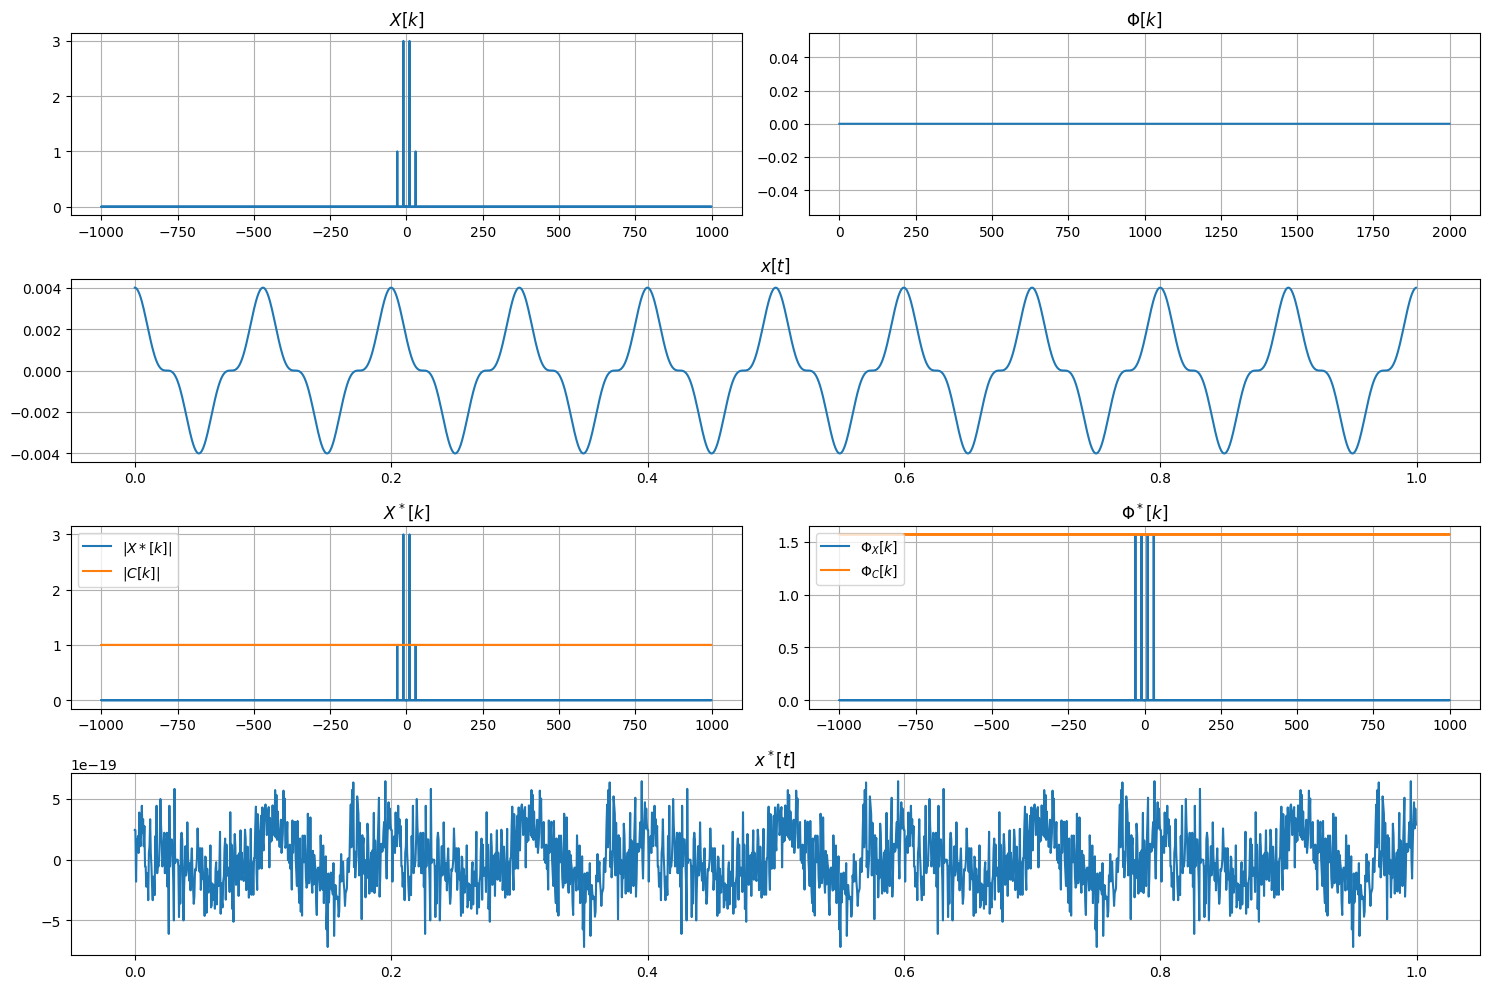

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros
Tini = 0
Tfin = 1
fm = 2000
f1 = 10
f2 = 30
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
N = len(t)
f = np.fft.fftfreq(N,1/fm)

# Espectro
S = np.zeros(N,dtype=complex)
S[f1] = 3 + 0j
S[-f1] = 3 + 0j
S[f2] = 1 + 0j
S[-f2] = 1 + 0j

# Senial en tiempo
s = np.fft.ifft(S).real

# Generar y aplicar filtro pasa-todo
ang = np.pi/2
c = [np.cos(ang) + 1j*np.sin(ang) for _ in range(N)]
ST = S*c                    # espectro filtrado
st = np.fft.ifft(ST).real   # señal filtrada

# Graficar
fig = plt.figure()
ax = [
    plt.subplot2grid([4,2],[0,0]),
    plt.subplot2grid([4,2],[0,1]),
    plt.subplot2grid([4,1],[1,0]),
    plt.subplot2grid([4,2],[2,0]),
    plt.subplot2grid([4,2],[2,1]),
    plt.subplot2grid([4,1],[3,0]),
]
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(f,np.abs(S))
ax[0].set_title('$X[k]$')
ax[1].plot(np.angle(S))
ax[1].set_title('$\\Phi[k]$')

ax[2].plot(t,s)
ax[2].set_title('$x[t]$')

ax[3].plot(f,np.abs(ST), label="$|X*[k]|$")
ax[3].plot(f,np.abs(c), label="$|C[k]|$")
ax[3].set_title('$X^*[k]$')
ax[3].legend(loc="upper left")
ax[4].plot(f,np.angle(ST), label="$\\Phi_X[k]$")
ax[4].plot(f,np.angle(c), label="$\\Phi_C[k]$")
ax[4].set_title('$\\Phi^*[k]$')
ax[4].legend(loc="upper left")

ax[5].plot(t,st)
ax[5].set_title('$x^*[t]$')
fig.tight_layout()

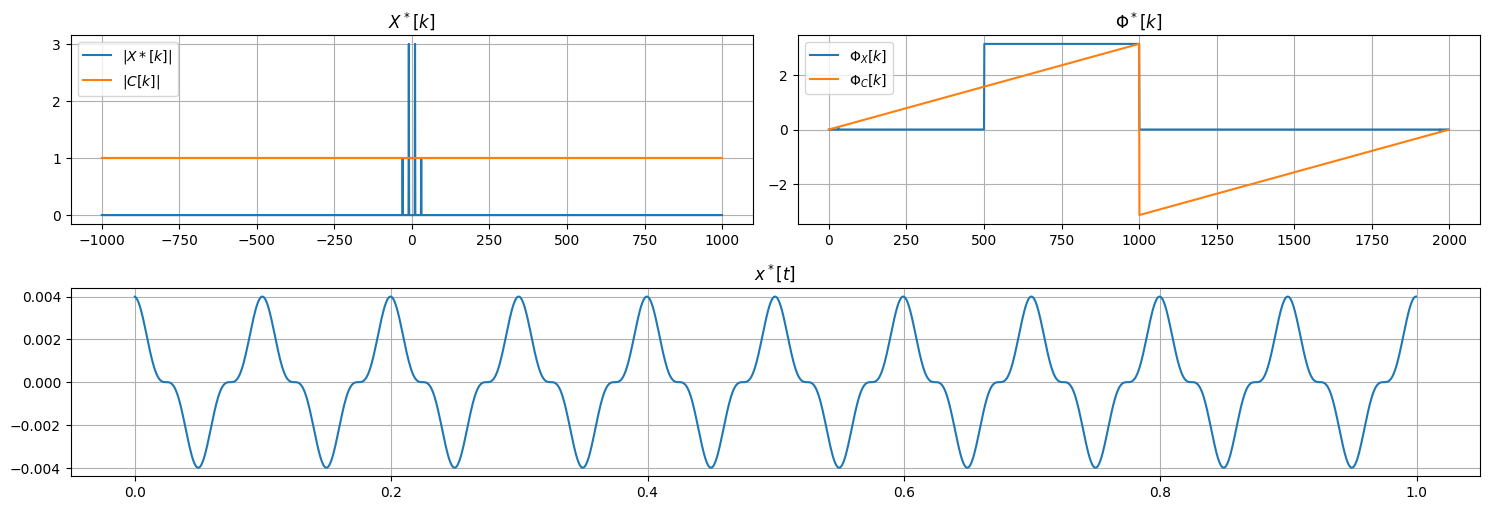

In [2]:
# Generar y aplicar filtro pasa-todo
deltaAng = 2*np.pi/N
c = [np.cos(k*deltaAng) + 1j*np.sin(k*deltaAng) for k in range(N)]
ST = S*c                    # espectro filtrado
st = np.fft.ifft(ST).real   # señal filtrada

# Graficar
fig = plt.figure()
ax = [
    plt.subplot2grid([4,2],[2,0]),
    plt.subplot2grid([4,2],[2,1]),
    plt.subplot2grid([4,1],[3,0]),
]
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(f,np.abs(ST), label="$|X*[k]|$")
ax[0].plot(f,np.abs(c), label="$|C[k]|$")
ax[0].set_title('$X^*[k]$')
ax[0].legend(loc="upper left")
ax[1].plot(np.angle(ST), label="$\\Phi_X[k]$")
ax[1].plot(np.angle(c), label="$\\Phi_C[k]$")
ax[1].set_title('$\\Phi^*[k]$')
ax[1].legend(loc="upper left")

ax[2].plot(t,st)
ax[2].set_title('$x^*[t]$')
fig.tight_layout()

/home/lucas/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lucas/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


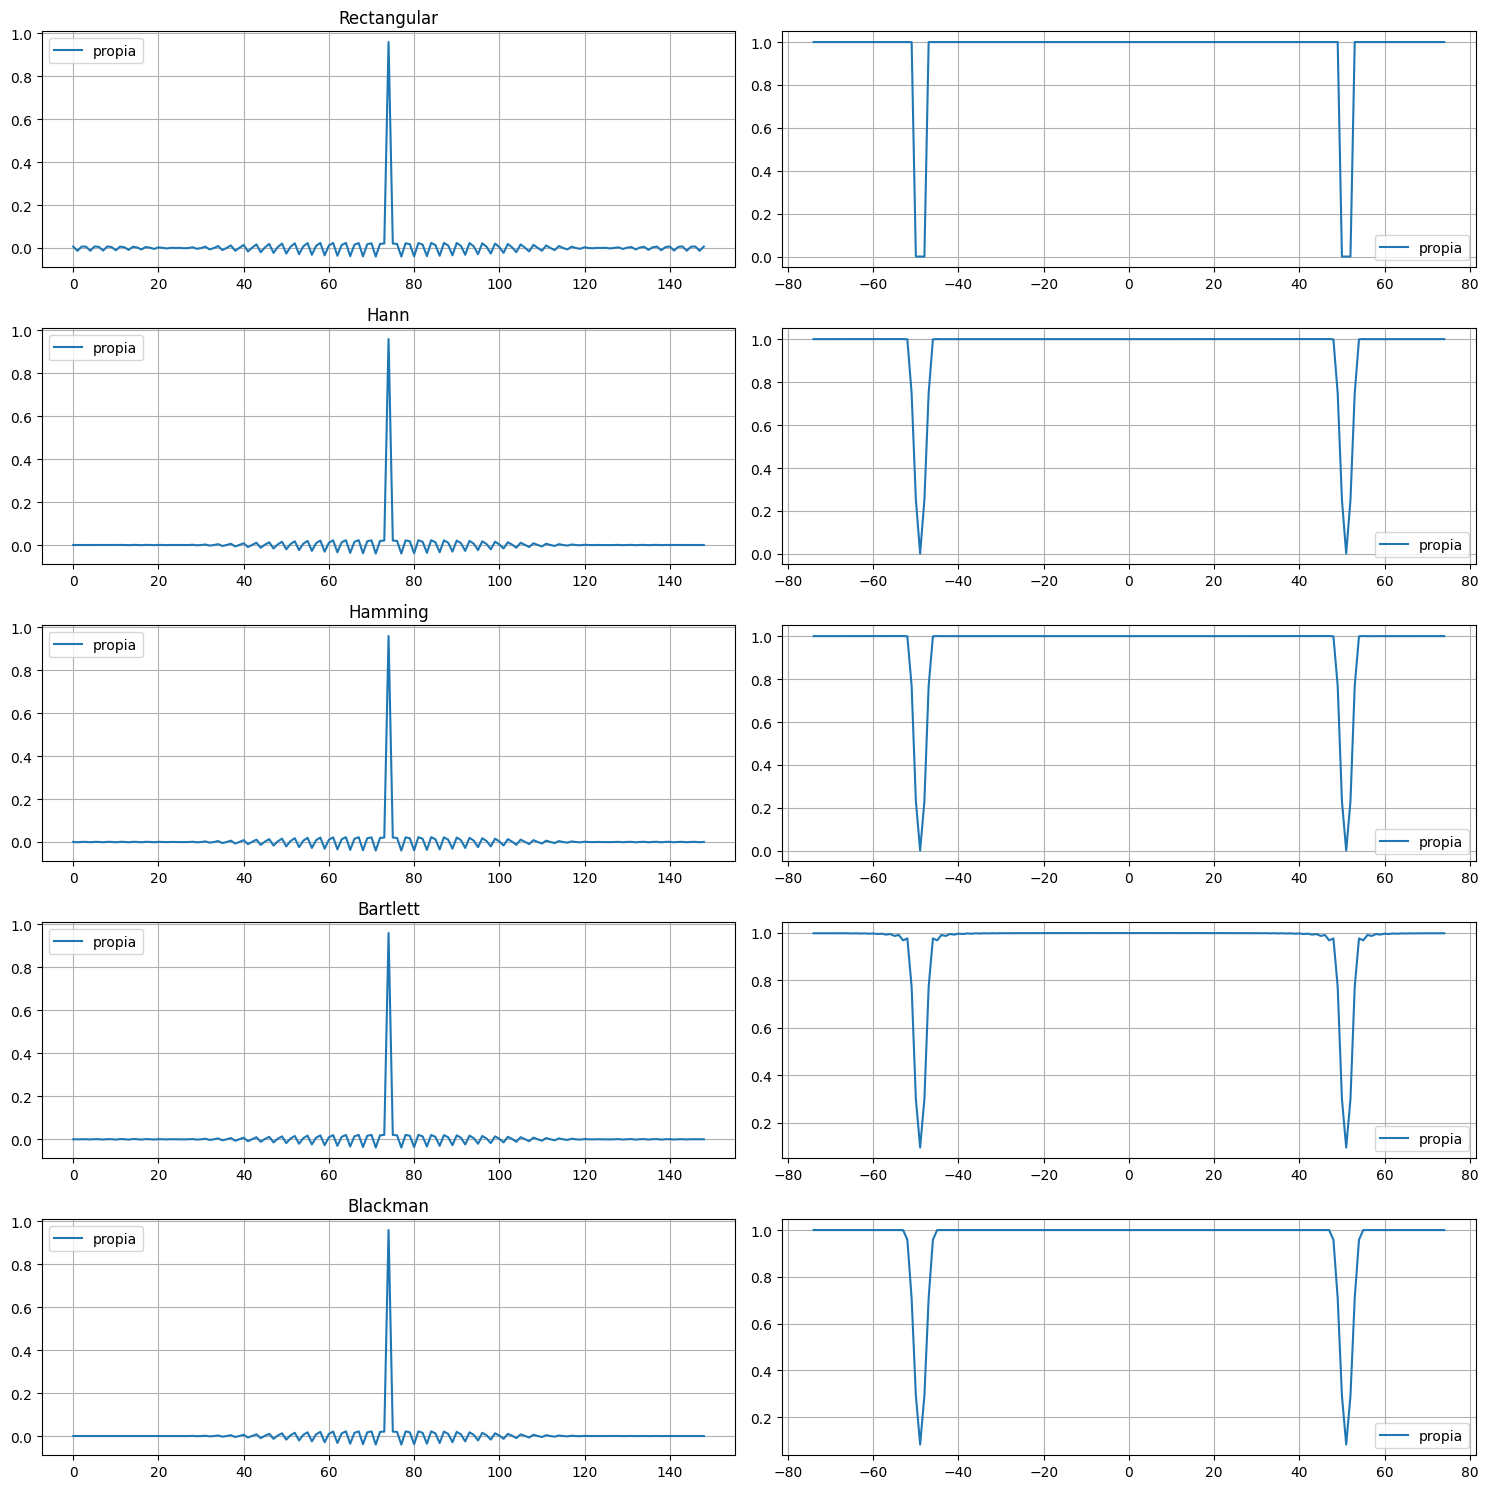

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin

def rectangular(s,Nini,Nfin):
    '''Ventana rectangular aplicada a s entre las muestras Nini y Nfin'''
    w = np.ones(Nfin-Nini)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def hann(s,Nini,Nfin):
    '''Ventana de Hann aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [0.5 for _ in range(N)] - 0.5 * np.cos(aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def hamming(s,Nini,Nfin):
    '''Ventana de Hamming aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [27/50 for _ in range(N)] - 23/50 * np.cos(aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def bartlett(s,Nini,Nfin):
    '''Ventana de Bartlett aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2.0/N
    w = np.where(np.less_equal(n,N/2.0),n*aux,[2 for _ in range(N)] - n*aux)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def blackman(s,Nini,Nfin):
    '''Ventana de Blackman aplicada a s entre las muestras Nini y Nfin'''
    N = Nfin-Nini
    n = np.linspace(0,N,N)

    aux = 2*np.pi/N
    w = [21/50 for _ in range(N)] - 0.5*np.cos(aux*n) + (2/25)*np.cos(2*aux*n)
    if Nini > 0:
        w = np.concatenate([np.zeros(Nini-1),w])
    if Nfin < len(s):
        w = np.concatenate([w,np.zeros(len(s)-len(w))])

    return np.multiply(w,s)

def retardar(X,i):
    N = len(X)
    k = np.arange(N)
    exp = np.exp(-2j*np.pi*k*i/N)
    Xret = X*exp
    return Xret

def rechazabandaFreq(N,f1,f2):
    '''genera la respuesta en frecuencia para un filtro pasa alto de frecuencia muestreal fm para frecuencias >= f'''
    k = np.arange(N)
    H = np.where(np.logical_or(np.less(k,f1),np.greater(k,N-f1)), 1, 0)
    H = np.where(np.logical_and(np.greater(k,f2),np.less(k,N-f2)), 1, H)
    return H

def FIRRechazaBanda(fmin,fmax,N,W):
    '''Genera un h[n] de un filtro pasa banda para frecuencias f1 <= k <= f2, con duracion N muestras y aplicando la ventana W'''
    xMuestreo = 10
    FMin = fmin*xMuestreo
    FMax = fmax*xMuestreo

    # Generar respuesta en frecuencia deseada
    X = rechazabandaFreq(N*xMuestreo,FMin,FMax)

    # Aplicar retardo
    X = retardar(X,(N-1 if N%2 != 0 else N)/2.0)

    # Antitransformar
    x = np.fft.ifft(X[np.arange(N)*10])

    # Aplicar ventana
    x = W(x,0,N)

    # Devolver muestreada en tiempo para N muestras
    return x[:N]

# Parametros
fmin = 49
fmax = 51
longitud = 149# Rechaza Banda

hrectangular = FIRRechazaBanda(fmin,fmax,longitud,rectangular)
hhann = FIRRechazaBanda(fmin,fmax,longitud,hann)
hhamming = FIRRechazaBanda(fmin,fmax,longitud,hamming)
hbartlett = FIRRechazaBanda(fmin,fmax,longitud,bartlett)
hblackman = FIRRechazaBanda(fmin,fmax,longitud,blackman)

# Acomodar para la grafica
Hrectangular = np.fft.fft(hrectangular)
Hrectangular = np.concatenate([Hrectangular[longitud//2:],Hrectangular[:longitud//2]])
Hhann = np.fft.fft(hhann)
Hhann = np.concatenate([Hhann[longitud//2:],Hhann[:longitud//2]])
Hhamming = np.fft.fft(hhamming)
Hhamming = np.concatenate([Hhamming[longitud//2:],Hhamming[:longitud//2]])
Hbartlett = np.fft.fft(hbartlett)
Hbartlett = np.concatenate([Hbartlett[longitud//2:],Hbartlett[:longitud//2]])
Hblackman = np.fft.fft(hblackman)
Hblackman = np.concatenate([Hblackman[longitud//2:],Hblackman[:longitud//2]])

# Graficar

fig, ax = plt.subplots(5,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for axi in ax:
    for axj in axi:
        axj.grid()

ax[0][0].plot(hrectangular, label='propia')
ax[0][0].set_title('Rectangular')
ax[0][0].legend(loc='upper left')
ax[1][0].plot(hhann, label='propia')
ax[1][0].set_title('Hann')
ax[1][0].legend(loc='upper left')
ax[2][0].plot(hhamming, label='propia')
ax[2][0].set_title('Hamming')
ax[2][0].legend(loc='upper left')
ax[3][0].plot(hbartlett, label='propia')
ax[3][0].set_title('Bartlett')
ax[3][0].legend(loc='upper left')
ax[4][0].plot(hblackman, label='propia')
ax[4][0].set_title('Blackman')
ax[4][0].legend(loc='upper left')

ax[0][1].plot(np.arange(len(Hrectangular))-longitud//2,np.abs(Hrectangular), label='propia')
ax[0][1].legend(loc='lower right')
ax[1][1].plot(np.arange(len(Hhann))-longitud//2,np.abs(Hhann), label='propia')
ax[1][1].legend(loc='lower right')
ax[2][1].plot(np.arange(len(Hhamming))-longitud//2,np.abs(Hhamming), label='propia')
ax[2][1].legend(loc='lower right')
ax[3][1].plot(np.arange(len(Hbartlett))-longitud//2,np.abs(Hbartlett), label='propia')
ax[3][1].legend(loc='lower right')
ax[4][1].plot(np.arange(len(Hblackman))-longitud//2,np.abs(Hblackman), label='propia')
ax[4][1].legend(loc='lower right')
fig.tight_layout()